In [25]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [26]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Fraud.csv")

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [29]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [30]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


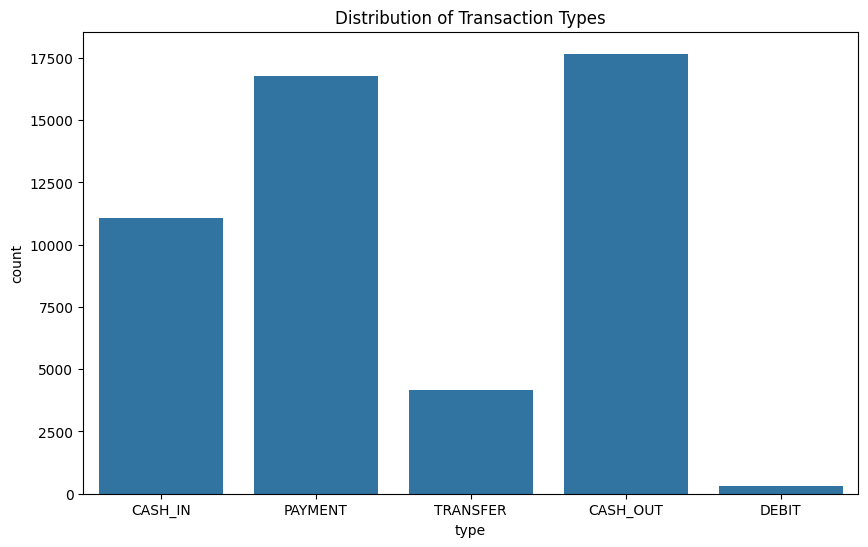

In [31]:
# Sample the data for visualizations (e.g., 50,000 rows)
df_sample = df.sample(n=50000, random_state=42)

# Visualize the distribution of transaction types
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=df_sample)
plt.title('Distribution of Transaction Types')
plt.show()

In [32]:
# Create new features
df['balanceOrig_diff'] = df['oldbalanceOrg'] - df['newbalanceOrig']

In [33]:
# One-hot encoding for the 'type' feature
df = pd.get_dummies(df, columns=['type'])

In [34]:
df.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceOrig_diff,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,False,False,False,True,False
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,False,False,False,True,False
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,False,False,False,False,True
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,False,True,False,False,False
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,False,False,False,True,False


In [35]:
# Define features and target
X = df.drop(['isFraud', 'nameOrig', 'nameDest'], axis=1)  # Features
y = df['isFraud']  # Target

In [36]:
# Check the features and target variable
print("Features: ", X.columns)
print("Target: ", y.name)

Features:  Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFlaggedFraud', 'balanceOrig_diff', 'type_CASH_IN',
       'type_CASH_OUT', 'type_DEBIT', 'type_PAYMENT', 'type_TRANSFER'],
      dtype='object')
Target:  isFraud


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the XGBoost model
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [38]:
# Predict on the test set
y_pred = model.predict(X_test)

In [39]:
# Evaluate the model
print("Confusion Matrix: \n",confusion_matrix(y_test, y_pred))
print("Classification report: \n",classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Confusion Matrix: 
 [[1906253      98]
 [    345    2090]]
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906351
           1       0.96      0.86      0.90      2435

    accuracy                           1.00   1908786
   macro avg       0.98      0.93      0.95   1908786
weighted avg       1.00      1.00      1.00   1908786

Accuracy: 0.9997679153137125


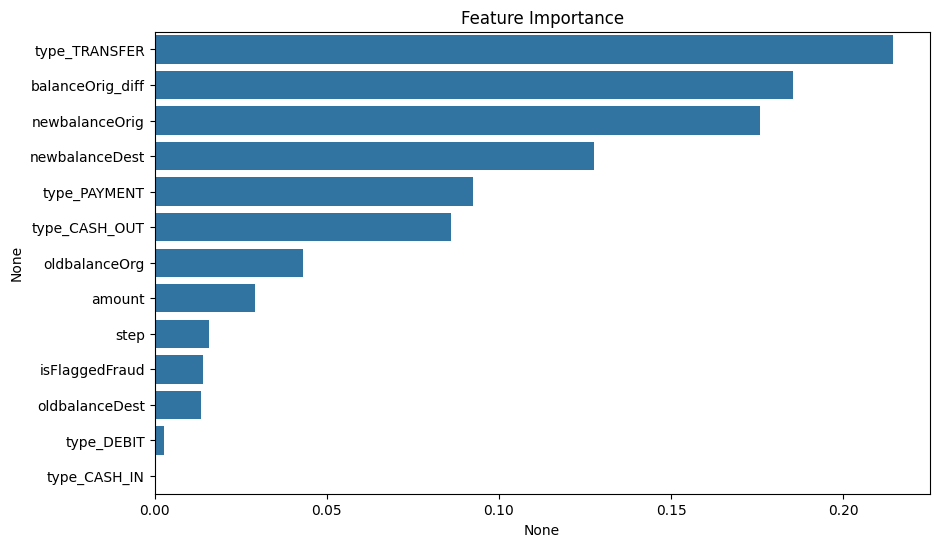

In [40]:
# Get feature importance
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importance')
plt.show()


In [47]:
# For testing the model a value
def predict_fraud(transaction):

    # Create a DataFrame from the transaction data
    new_df = pd.DataFrame([transaction])

    # Create additional features
    new_df['balanceOrig_diff'] = new_df['oldbalanceOrg'] - new_df['newbalanceOrig']
    new_df = pd.get_dummies(new_df, columns=['type'])

    # Ensure all columns are present
    missing_cols = set(X_train.columns) - set(new_df.columns)
    for c in missing_cols:
        new_df[c] = 0

    # Reorder columns to match the training data
    new_df = new_df[X_train.columns]

    # Predict the fraud
    prediction = model.predict(new_df)
    return prediction[0]

# Define the transaction
transaction = {
    'step': 95,
    'type': 'CASH_OUT',
    'amount': 87999.25,
    'nameOrig': 'C409531429',
    'oldbalanceOrg': 87999.25,
    'newbalanceOrig': 0,
    'nameDest': 'C1827219533',
    'oldbalanceDest': 0,
    'newbalanceDest': 87999.25,
    'isFlaggedFraud': 0
}


# Example of how to call the function (ensure model and X_train are properly initialized)
prediction = predict_fraud(transaction)
print(f'The transaction is predicted to be {"fraudulent" if prediction == 1 else "not fraudulent"}')


The transaction is predicted to be fraudulent
